<a href="https://colab.research.google.com/github/thedarkscepter/jubilant-eureka/blob/main/131.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving data.csv to data.csv


In [ ]:
import csv
rows = []
with open('data.csv', 'r') as f:
  csvreader = csv.reader(f)
  for row in csvreader:
    rows.append(row)
headers = rows[0]
planet_data_rows = rows[1:]
print(headers)
print(planet_data_rows[0])

['', 'name', 'light_years_from_earth', 'planet_mass', 'stellar_magnitude', 'discovery_date', 'planet_type', 'planet_radius', 'orbital_radius', 'orbital_period', 'eccentricity', 'solar_system_name', 'planet_discovery_method', 'planet_orbital_inclination', 'planet_density', 'right_ascension', 'declination', 'host_temperature', 'host_mass', 'host_radius']
['0', '11 Comae Berenices b', '305.0', '19.4 Jupiters', '4.74', '2007', 'Gas Giant', '1.08 x Jupiter', '1.29 AU', '326 days', '0.23', '11 Com', 'Radial Velocity', '', '', '12h20m43.03s', '+17d47m34.3s', '4742.0', '2.7', '19.0']


In [ ]:
headers[0] = 'row_num'
solar_system_planet_count = {}
for planet_data in planet_data_rows:
  if solar_system_planet_count.get(planet_data[11]):
    solar_system_planet_count[planet_data[11]] += 1
  else:
    solar_system_planet_count[planet_data[11]] = 1
max_solar_system = max(solar_system_planet_count, key = solar_system_planet_count.get)
print('solar system {} has most planets {} out of the ss we know'.format (max_solar_system, solar_system_planet_count[max_solar_system]))

solar system KOI-351 has most planets 8 out of the ss we know


In [ ]:
temp_planet_data_rows = list(planet_data_rows)
for planet_data in temp_planet_data_rows:
  planet_mass = planet_data[3]
  if planet_mass.lower() == 'unknown':
    planet_data_rows.remove(planet_data)
    continue
  else:
    planet_mass_value = planet_mass.split(" ")[0]
    planet_mass_ref = planet_mass.split(" ")[1]
    if planet_mass_ref == 'Jupiters':
      planet_mass_value = float(planet_mass_value) * 317.8
    planet_data[3] = planet_mass_value

  planet_radius = planet_data[7]
  if planet_radius.lower() == 'unknown':
    planet_data_rows.remove(planet_data)
    continue
  else:
    planet_radius_value = planet_radius.split(" ")[0]
    planet_radius_ref = planet_radius.split(" ")[2]
    if planet_radius_ref == 'Jupiters':
      planet_radius_value = float(planet_radius_value) * 11.2
    planet_data[7] = planet_radius_value

print(len(planet_data_rows))
hd_10180_planet = []
for planet_data in planet_data_rows:
  if max_solar_system == planet_data[11]:
    hd_10180_planet.append(planet_data)
print(len(hd_10180_planet))
print(hd_10180_planet)

4251
7
[['3665', 'Kepler-903 b', '2704.0', '4.7', '14.615', '2016', 'Super Earth', '2.01', 'Unknown', '10.4 days', '0.0', 'KOI-351', 'Transit', '89.2', '', '18h57m44.04s', '+49d18m18.6s', '6080.0', '1.2', '1.2'], ['3824', 'KOI-142 b', '1106.0', '9.5', '13.11', '2013', 'Neptune-like', '0.307', 'Unknown', '10.9 days', '0.06', 'KOI-351', 'Transit', '89.4', '', '18h57m44.04s', '+49d18m18.6s', '6080.0', '1.2', '1.2'], ['3825', 'KOI-142 c', '1106.0', 214.1972, '13.11', '2013', 'Gas Giant', '1.25', '0.15525 AU', '22.3 days', '0.06', 'KOI-351', 'Transit', '89.68', '', '18h57m44.04s', '+49d18m18.6s', '6080.0', '1.2', '1.2'], ['3826', 'KOI-1599.01', '3813.0', '4.6', '14.854000000000001', '2019', 'Super Earth', '1.9', '0.14728 AU', '20.4 days', '0.01', 'KOI-351', 'Transit', '89.71', '', '18h57m44.04s', '+49d18m18.6s', '6080.0', '1.2', '1.2'], ['3827', 'KOI-1599.02', '3813.0', '9', '14.854000000000001', '2019', 'Super Earth', '1.9', '0.112293 AU', '13.6 days', '0.01', 'KOI-351', 'Transit', '89.79'

In [ ]:
import plotly.express as px 
hd_10180_planet_masses = []
hd_10180_planet_names = []
for planet_data in hd_10180_planet:
  hd_10180_planet_masses.append(planet_data[3])
  hd_10180_planet_names.append(planet_data[1])
hd_10180_planet_masses.append(1)
hd_10180_planet_names.append('Earth')
fig = px.bar(x = hd_10180_planet_names, y = hd_10180_planet_masses)
fig.show()

In [ ]:
temp_planet_data_rows = list(planet_data_rows)
for planet_data in temp_planet_data_rows:
  if planet_data[1].lower() == 'hd 100546 b':
    planet_data_rows.remove(planet_data)

planet_masses = []
planet_radii = []
planet_names = []
for planet_data in planet_data_rows:
  planet_masses.append(planet_data[3])
  planet_radii.append(planet_data[7])
  planet_names.append(planet_data[1])

planet_gravity = []
for index, name in enumerate(planet_names):
  gravity = (float(planet_masses[index])* 5.972e+24)/(float(planet_radii[index])*float(planet_radii[index])* 6371000 * 6371000) * 6.674e-11
  planet_gravity.append(gravity)
fig = px.scatter(x = planet_radii, y = planet_masses, size = planet_gravity, hover_data = [planet_names])
fig.show()

In [ ]:
low_gravity_planet = []
for index, gravity in enumerate(planet_gravity):
  if gravity < 10:
    low_gravity_planet.append(planet_data_rows[index])
print(len(low_gravity_planet))

196


In [ ]:
for index, gravity in enumerate(planet_gravity):
  if gravity < 100:
    low_gravity_planet.append(planet_data_rows[index])
print(len(low_gravity_planet))

1767


In [ ]:
print(headers)

['row_num', 'name', 'light_years_from_earth', 'planet_mass', 'stellar_magnitude', 'discovery_date', 'planet_type', 'planet_radius', 'orbital_radius', 'orbital_period', 'eccentricity', 'solar_system_name', 'planet_discovery_method', 'planet_orbital_inclination', 'planet_density', 'right_ascension', 'declination', 'host_temperature', 'host_mass', 'host_radius']


In [ ]:
planet_type_values = []
for planet_data in planet_data_rows:
  planet_type_values.append(planet_data[6])
print(list(set(planet_type_values)))

['Neptune-like', 'Gas Giant', 'Terrestrial', 'Super Earth']


In [ ]:
planet_masses = []
planet_radii = []

for planet_data in low_gravity_planet:
  planet_masses.append(planet_data[3])
  planet_radii.append(planet_data[7])
fig = px.scatter(x = planet_radii, y = planet_masses)
fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



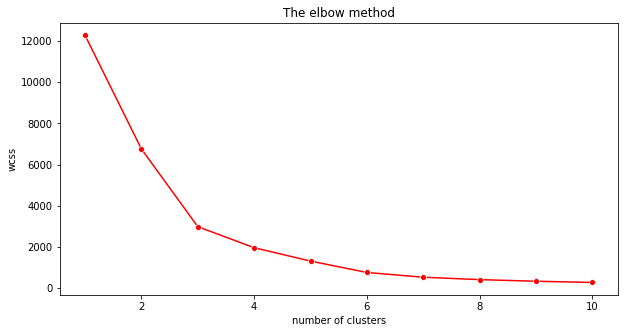

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
import seaborn as sns 
X = []
for index, planet_mass in enumerate(planet_masses):
  temp_list = [
               planet_radii[index], planet_mass
  ]
  X.append(temp_list)
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.figure(figsize = (10,5))
sns.lineplot(range(1,11), wcss, marker = 'o', color = 'red')
plt.title('The elbow method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
planet_masses = []
planet_radii = []
planet_types = []

for planet_data in low_gravity_planet:
  planet_masses.append(planet_data[3])
  planet_radii.append(planet_data[7])
  planet_types.append(planet_data[6])
fig = px.scatter(x = planet_radii, y = planet_masses, color = planet_types)
fig.show()

In [ ]:
suitable_planets = []
for planet_data in low_gravity_planet:
  if planet_data[6].lower() == 'terrestrial' or planet_data[6].lower() == 'super earth':
    suitable_planets.append(planet_data)
print(len(suitable_planets))


1595
